In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import (KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, MeanShift)
from sklearn.decomposition import PCA
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from mpl_toolkits.mplot3d        import Axes3D

# -------------------------------------------------------------------
# Chargement et split
df = pd.read_csv('DATA/clients.csv')
df_nouveaux = df[df['is_recurrent']==0].copy()
df_fideles   = df[df['is_recurrent']==1].copy()

In [2]:
df_fideles.head()

,Unnamed: 0,ville,etat,n_commandes,montant_total,satisfaction_moy,date_derniere_cmd,recence,temps_moyen_inter_achat,freq_par_semaine,paiement_pref,nb_produits,n_categories,is_recurrent
0,0,sao paulo,SP,17,15769.71,4.764706,2018-08-20 19:14:26,58,28.875000,0.242424,credit_card,15,3,1
1,1,praia grande,SP,9,17672.22,2.642857,2018-02-27 18:36:39,232,19.400000,0.360825,credit_card,13,5,1
2,2,santos,SP,7,6811.63,5.000000,2018-06-28 00:43:34,111,38.000000,0.184211,credit_card,5,1,1
3,3,recife,PE,7,14885.08,5.000000,2018-06-01 11:38:29,138,24.727273,0.283088,credit_card,9,4,1
4,4,ituiutaba,MG,7,9705.78,5.000000,2018-02-14 13:22:12,245,14.875000,0.470588,boleto,9,5,1


In [3]:
df_nouveaux.head()

,Unnamed: 0,ville,etat,n_commandes,montant_total,satisfaction_moy,date_derniere_cmd,recence,temps_moyen_inter_achat,freq_par_semaine,paiement_pref,nb_produits,n_categories,is_recurrent
3120,3120,maringa,PR,1,56.32,5.0,2018-04-06 11:26:54,194,NaN,7.0,boleto,1,1,0
3121,3121,sao luis,MA,1,71.05,1.0,2017-10-04 20:26:53,378,NaN,7.0,credit_card,1,1,0
3122,3122,amanari,CE,1,419.39,5.0,2018-07-08 09:17:59,101,NaN,7.0,credit_card,1,1,0
3123,3123,ourinhos,SP,1,143.92,5.0,2017-06-11 09:46:11,493,NaN,7.0,credit_card,1,1,0
3124,3124,cristais paulista,SP,1,352.98,4.0,2017-03-05 19:25:45,591,NaN,7.0,credit_card,1,1,0




########### TRAITEMENT NOUVEAUX ###########


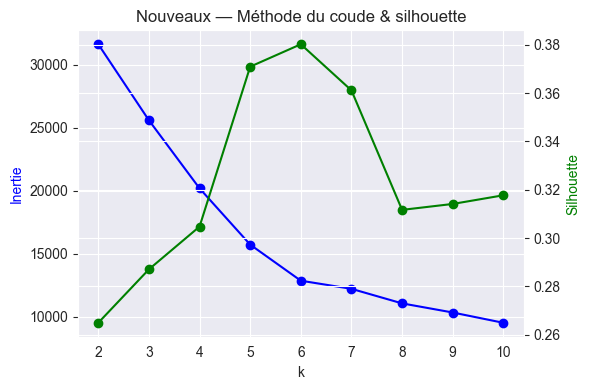


=== Comparatif méthodes — Nouveaux ===
                 n_clusters  silhouette
KMeans                  7.0    0.361129
MiniBatchKMeans         7.0    0.323260
Agglomerative           7.0    0.352103
DBSCAN                  8.0    0.599655
MeanShift              31.0    0.543800


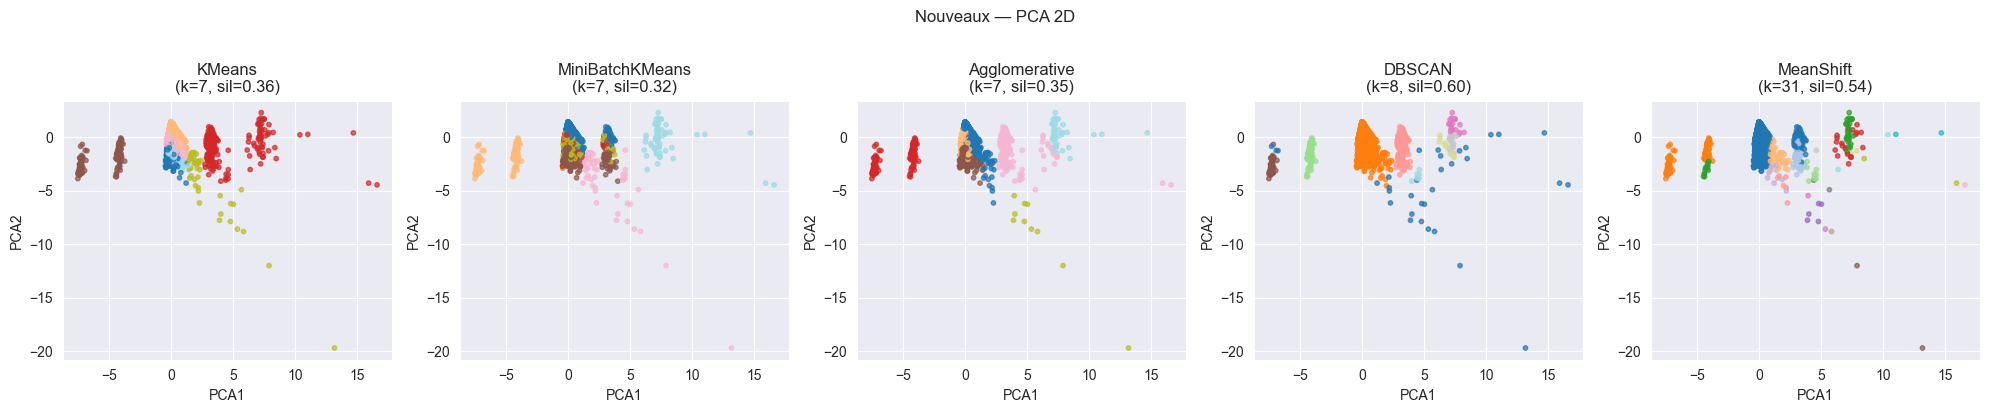

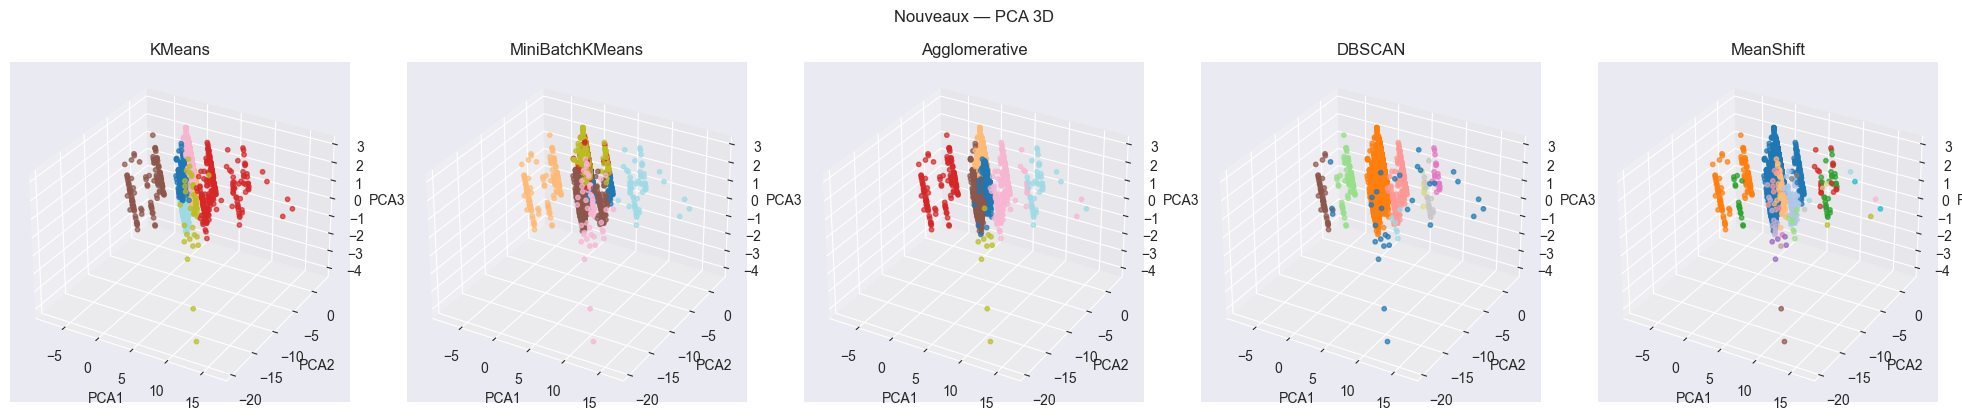

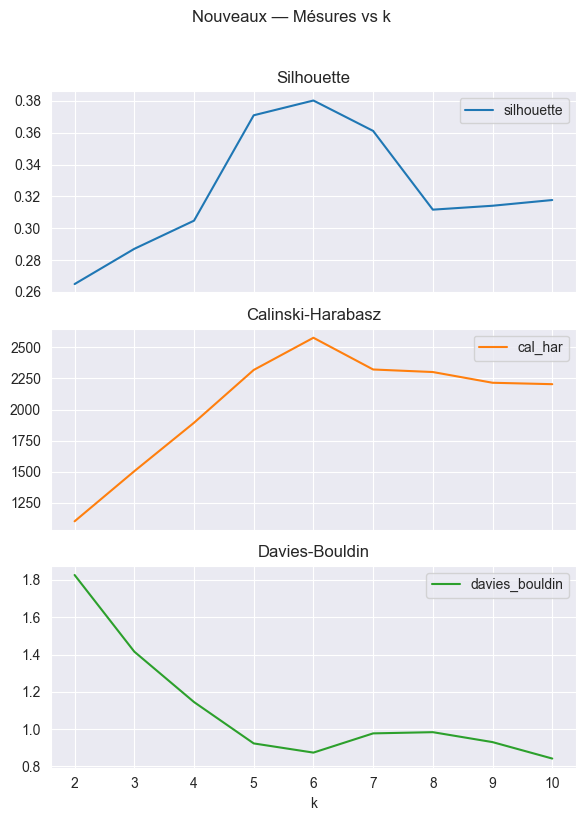


=== Elbow details — Nouveaux ===
    k       inertia         drop   pct_drop
0   2  31629.019279          NaN        NaN
1   3  25599.248346  6029.770933  19.064046
2   4  20200.062236  5399.186111  21.091190
3   5  15737.642296  4462.419940  22.091120
4   6  12875.952220  2861.690075  18.183728
5   7  12231.552863   644.399358   5.004673
6   8  11077.048610  1154.504252   9.438738
7   9  10353.724415   723.324195   6.529936
8  10   9537.313737   816.410678   7.885188


########### TRAITEMENT FIDELES ###########


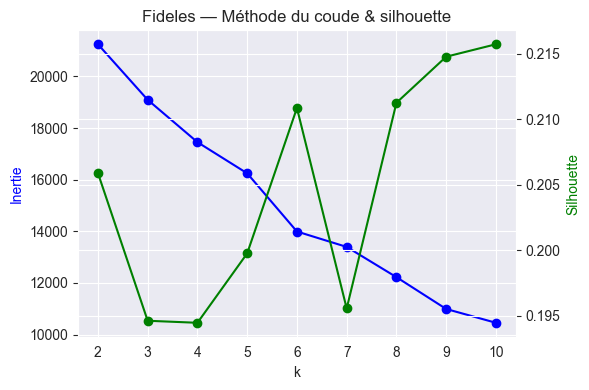


=== Comparatif méthodes — Fideles ===
                 n_clusters  silhouette
KMeans                  7.0    0.195552
MiniBatchKMeans         7.0    0.214924
Agglomerative           7.0    0.167641
DBSCAN                  6.0    0.115789
MeanShift              19.0    0.303748


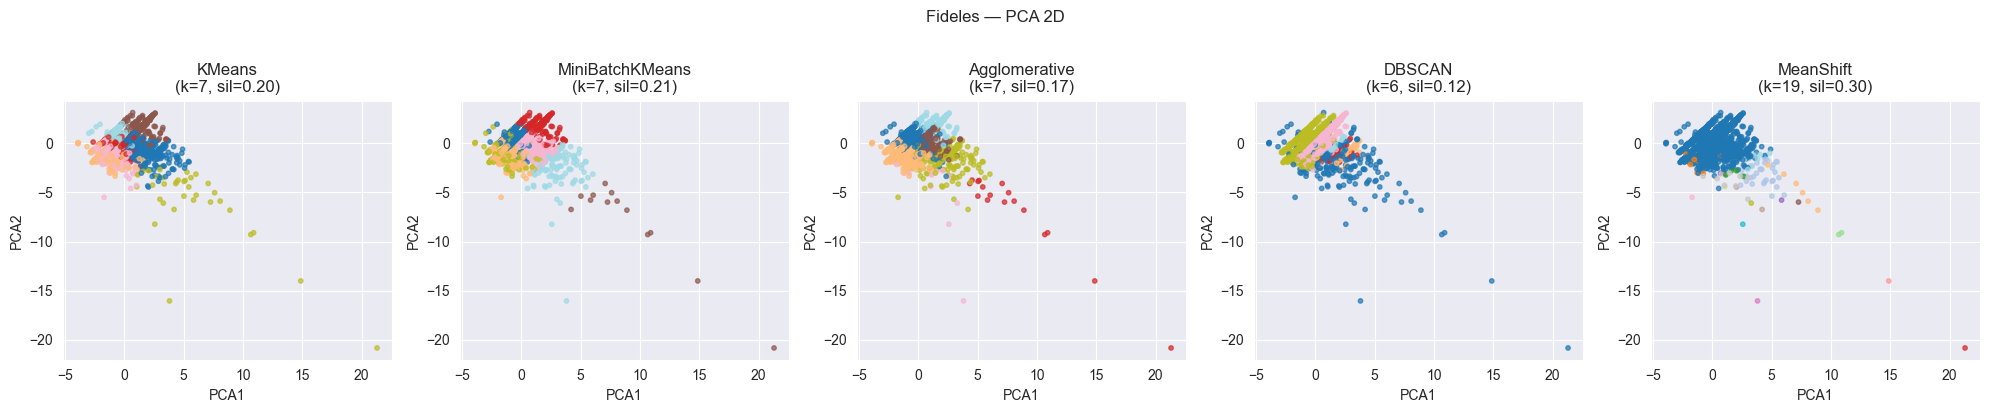

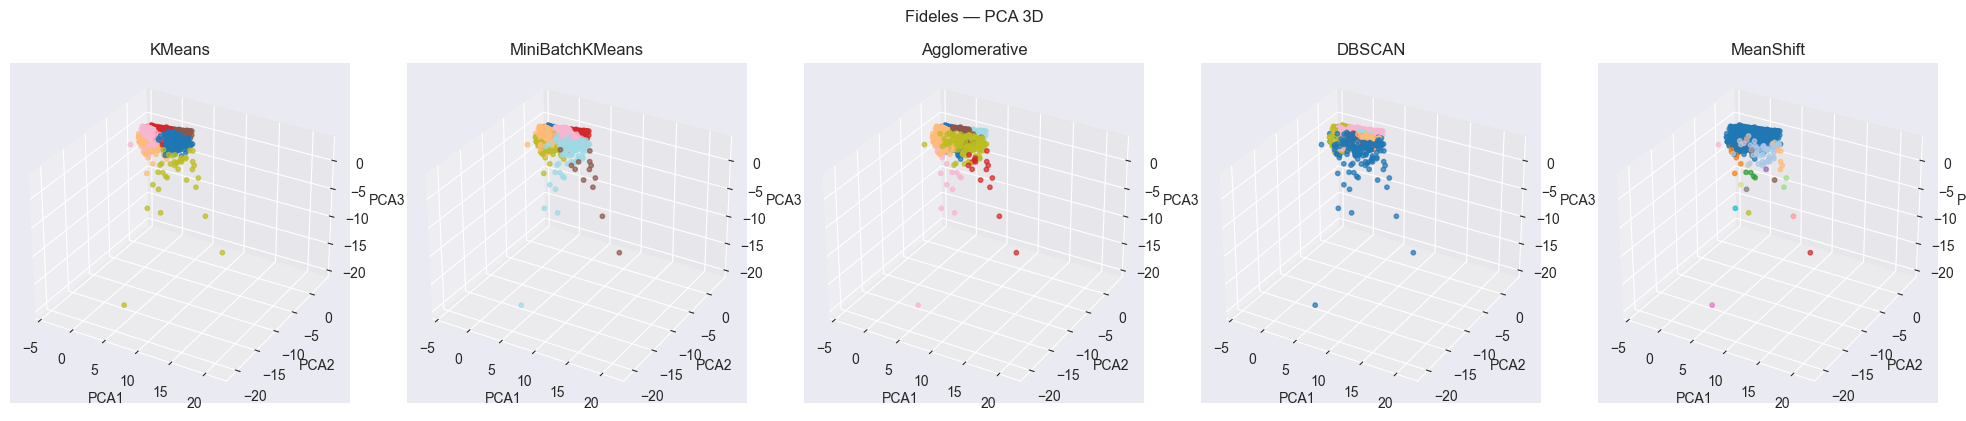

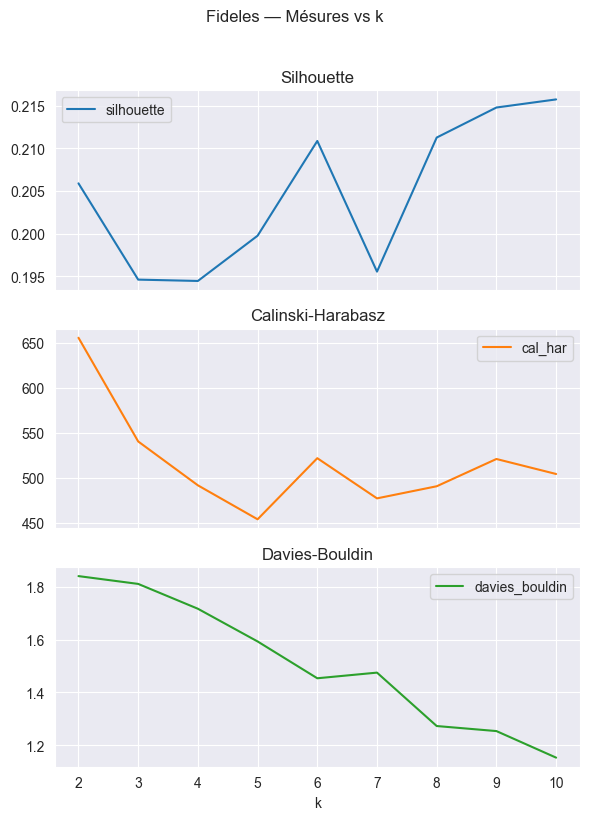


=== Elbow details — Fideles ===
    k       inertia         drop   pct_drop
0   2  21243.592443          NaN        NaN
1   3  19091.714293  2151.878149  10.129540
2   4  17451.899662  1639.814631   8.589143
3   5  16245.169316  1206.730346   6.914607
4   6  13991.015719  2254.153597  13.875839
5   7  13395.062869   595.952850   4.259540
6   8  12224.138859  1170.924010   8.741460
7   9  10990.992798  1233.146060  10.087795
8  10  10456.268421   534.724378   4.865114

Répartition clients & clusters :
type_client  cluster
fidele       0           875
             1           345
             2           627
             3           568
             4           705
nouveau      0          2938
             1          3825
             2           237
dtype: int64

=== Profil Nouveaux ===

-- Numérique --
        n_commandes                   montant_total                       \
               mean median  std count          mean median     std count   
cluster                          

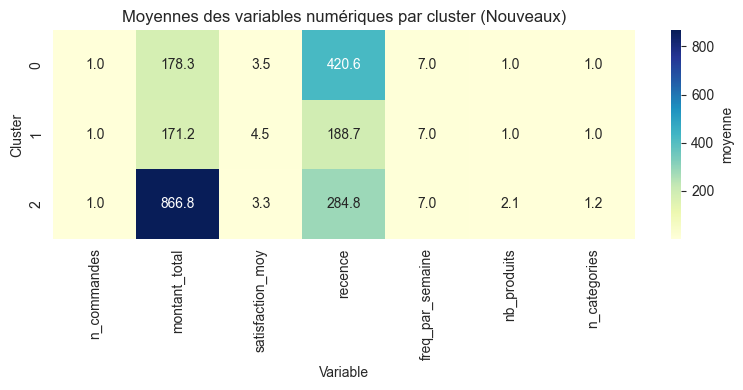

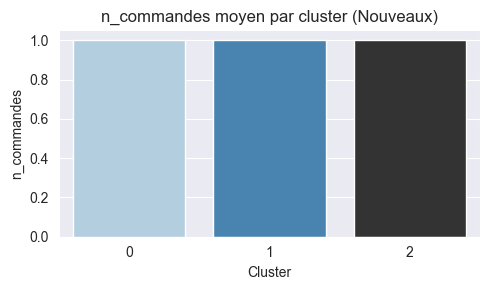

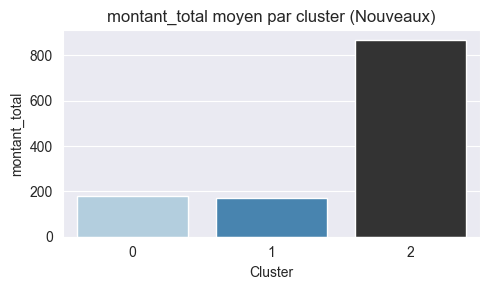


=== Profil Fideles ===

-- Numérique --
        n_commandes                   montant_total                       \
               mean median  std count          mean median     std count   
cluster                                                                    
0               2.3    2.0  0.9   875        1198.9  608.7  1877.0   875   
1               2.1    2.0  0.2   345        2273.9  654.5  7755.4   345   
2               2.0    2.0  0.2   627         822.0  476.3  1506.3   627   
3               2.0    2.0  0.1   568         610.5  423.1   649.9   568   
4               2.0    2.0  0.2   705         839.1  487.9  1185.0   705   

        satisfaction_moy         ... nb_produits       n_categories         \
                    mean median  ...         std count         mean median   
cluster                          ...                                         
0                    4.4    5.0  ...         1.1   875          2.1    2.0   
1                    1.6    1.5  ...  

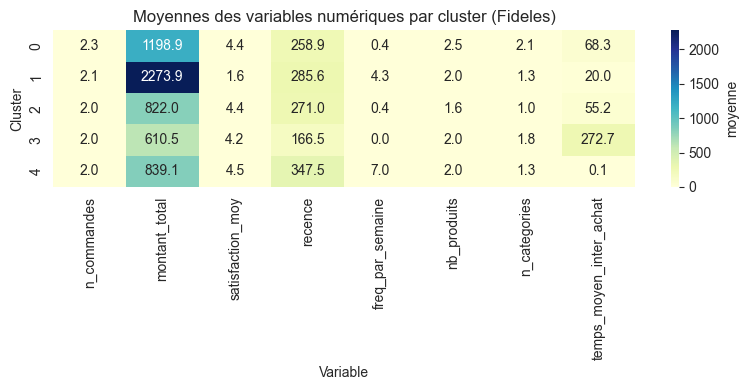

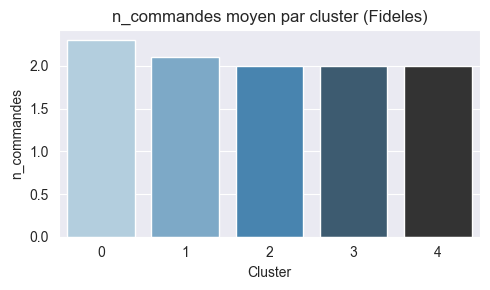

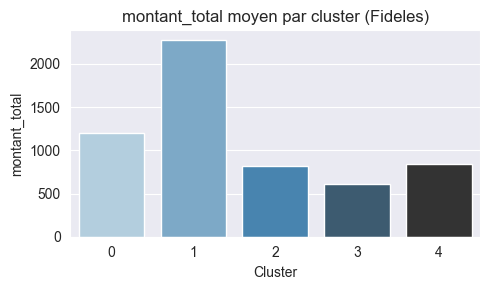

In [4]:
# -------------------------------------------------------------------
# 1) Définition des variables
cat_cols = ['paiement_pref']
base_num = ['n_commandes', 'montant_total', 'satisfaction_moy',
            'recence', 'freq_par_semaine', 'nb_produits', 'n_categories']
num_n = base_num
num_f = base_num + ['temps_moyen_inter_achat']

# -------------------------------------------------------------------
# 2) Pipelines
preproc_n = ColumnTransformer([
    ('num', StandardScaler(), num_n),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])
preproc_f = ColumnTransformer([
    ('num', StandardScaler(), num_f),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])

X_n = preproc_n.fit_transform(df_nouveaux[num_n + cat_cols])
X_f = preproc_f.fit_transform(df_fideles  [num_f + cat_cols])

# -------------------------------------------------------------------
# Fonctions
def plot_elbow_silhouette(X, k_range, title_prefix):
    inertias, silhouettes = [], []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=0).fit(X)
        inertias .append(km.inertia_)
        silhouettes.append(silhouette_score(X, km.labels_))
    fig, ax1 = plt.subplots(figsize=(6,4))
    ax1.plot(k_range, inertias,  'bo-', label='Inertie')
    ax1.set_xlabel('k'); ax1.set_ylabel('Inertie', color='b')
    ax2 = ax1.twinx()
    ax2.plot(k_range, silhouettes, 'go-', label='Silhouette')
    ax2.set_ylabel('Silhouette', color='g')
    plt.title(f"{title_prefix} — Méthode du coude & silhouette")
    fig.tight_layout()
    plt.show()

def compare_clusterers(X, title_prefix):
    clusterers = {
        "KMeans":           KMeans(n_clusters=7, random_state=0),
        "MiniBatchKMeans":  MiniBatchKMeans(n_clusters=7, random_state=0),
        "Agglomerative":    AgglomerativeClustering(n_clusters=7),
        "DBSCAN":           DBSCAN(eps=1.5, min_samples=5),
        "MeanShift":        MeanShift()
    }
    results = {}
    for name, algo in clusterers.items():
        labels = algo.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        sil = (silhouette_score(X, labels)
               if n_clusters>1 else np.nan)
        results[name] = {'n':n_clusters, 'sil':sil, 'labels':labels}
    summary = pd.DataFrame({
        name: {'n_clusters':res['n'], 'silhouette':res['sil']}
        for name,res in results.items()
    }).T
    print(f"\n=== Comparatif méthodes — {title_prefix} ===")
    print(summary)
    return results

def plot_pca_2d3d(X, results, title_prefix):
    # PCA 2D
    pca2 = PCA(2).fit_transform(X)
    n = len(results)
    fig, axes = plt.subplots(1, n, figsize=(4*n,4), squeeze=False)
    for ax,(name,res) in zip(axes.flat, results.items()):
        sc = ax.scatter(pca2[:,0], pca2[:,1],
                        c=res['labels'], cmap='tab20', s=10, alpha=0.7)
        ax.set_title(f"{name}\n(k={res['n']}, sil={res['sil']:.2f})")
        ax.set_xlabel('PCA1'); ax.set_ylabel('PCA2')
    plt.suptitle(f"{title_prefix} — PCA 2D", y=1.02)
    plt.tight_layout()
    plt.show()
    # PCA 3D
    pca3 = PCA(3).fit_transform(X)
    fig = plt.figure(figsize=(4*n,4))
    for i,(name,res) in enumerate(results.items(),1):
        ax = fig.add_subplot(1,n,i, projection='3d')
        ax.scatter(pca3[:,0], pca3[:,1], pca3[:,2],
                   c=res['labels'], cmap='tab20', s=10, alpha=0.7)
        ax.set_title(name)
        ax.set_xlabel('PCA1'); ax.set_ylabel('PCA2'); ax.set_zlabel('PCA3')
    plt.suptitle(f"{title_prefix} — PCA 3D", y=1.02)
    plt.tight_layout()
    plt.show()

def metrics_vs_k(X, kmin, kmax, title_prefix):
    ks, sils, chs, dbs = [], [], [], []
    for k in range(kmin,kmax+1):
        labels = KMeans(n_clusters=k, random_state=0).fit_predict(X)
        ks.append(k)
        sils.append(silhouette_score(X, labels))
        chs.append(calinski_harabasz_score(X, labels))
        dbs.append(davies_bouldin_score(X, labels))
    dfm = pd.DataFrame({
        'k':ks,'silhouette':sils,
        'cal_har':chs,'davies_bouldin':dbs
    }).set_index('k')
    dfm.plot(subplots=True, layout=(3,1), figsize=(6,8),
             title=['Silhouette','Calinski-Harabasz','Davies-Bouldin'])
    plt.suptitle(f"{title_prefix} — Mésures vs k", y=1.02)
    plt.tight_layout()
    plt.show()

def elbow_details(X, k_range, title_prefix):
    drops, inertias = [], []
    for k in k_range:
        inertias.append(KMeans(n_clusters=k, random_state=0).fit(X).inertia_)
    df_e = pd.DataFrame({'k':k_range,'inertia':inertias})
    df_e['drop']     = df_e['inertia'].shift(1) - df_e['inertia']
    df_e['pct_drop'] = df_e['drop'] / df_e['inertia'].shift(1)*100
    print(f"\n=== Elbow details — {title_prefix} ===")
    print(df_e)
    return df_e

def profile_clusters(df_seg, num_cols, cat_cols):
    # num
    prof_n = df_seg.groupby('cluster')[num_cols]\
                   .agg(['mean','median','std','count']).round(1)
    # cat
    prof_c = df_seg.groupby(['cluster']+cat_cols).size()\
                   .unstack(fill_value=0)\
                   .apply(lambda x:100*x/x.sum(), axis=1).round(1)
    return prof_n, prof_c

# -------------------------------------------------------------------
# 3) Diagnostics pour les deux populations
for name, X, num_cols, df_grp in [
    ('Nouveaux', X_n, num_n, df_nouveaux),
    ('Fideles',  X_f, num_f, df_fideles)
]:
    print(f"\n\n########### TRAITEMENT {name.upper()} ###########")
    # 3a) Elbow & silhouette
    plot_elbow_silhouette(X, range(2,11), name)
    # 3b) Comparatif méthodes
    results = compare_clusterers(X, name)
    # 3c) PCA plots
    plot_pca_2d3d(X, results, name)
    # 3d) Mètres vs k
    metrics_vs_k(X, 2, 10, name)
    # 3e) Elbow details
    elbow_details(X, range(2,11), name)

# -------------------------------------------------------------------
# 4) Choix des k finaux
k_n, k_f = 3, 5
km_n = KMeans(n_clusters=k_n, random_state=0).fit(X_n)
km_f = KMeans(n_clusters=k_f, random_state=0).fit(X_f)

df_nouveaux['cluster'] = km_n.labels_
df_fideles  ['cluster'] = km_f.labels_
df_nouveaux['type_client'] = 'nouveau'
df_fideles  ['type_client'] = 'fidele'

# fusion
df_final = pd.concat([df_nouveaux, df_fideles], ignore_index=True)
print("\nRépartition clients & clusters :")
print(df_final.groupby(['type_client','cluster']).size())

# -------------------------------------------------------------------
# 5) Profilage des clusters
for name, df_grp, num_cols in [
    ('Nouveaux', df_nouveaux, num_n),
    ('Fideles',  df_fideles,  num_f)
]:
    print(f"\n=== Profil {name} ===")
    prof_n, prof_c = profile_clusters(df_grp, num_cols, cat_cols)
    print("\n-- Numérique --")
    print(prof_n)
    print("\n-- Catégoriel (%) --")
    print(prof_c)
    # heatmap des moyennes
    means = prof_n.xs('mean', level=1, axis=1)
    plt.figure(figsize=(8,4))
    sns.heatmap(means, annot=True, fmt=".1f", cmap='YlGnBu',
                cbar_kws={'label':'moyenne'})
    plt.title(f"Moyennes des variables numériques par cluster ({name})")
    plt.xlabel('Variable'); plt.ylabel('Cluster')
    plt.tight_layout(); plt.show()
    # barplots sur 2 variables clés
    key_vars = ['n_commandes','montant_total']
    for col in key_vars:
        if col in means.columns:
            plt.figure(figsize=(5,3))
            sns.barplot(x=means.index, y=means[col],
                        palette="Blues_d", hue=means.index, dodge=False)
            plt.title(f"{col} moyen par cluster ({name})")
            plt.xlabel('Cluster'); plt.ylabel(col)
            plt.legend([],[], frameon=False)
            plt.tight_layout(); plt.show()


In [5]:
# Sauvegarde des clusters :
joblib.dump(preproc_n, 'joblib/pipeline_nouveaux.joblib')
joblib.dump(preproc_f, 'joblib/pipeline_fideles.joblib')
joblib.dump(km_n, 'joblib/kmeans_nouveaux.joblib')
joblib.dump(km_f, 'joblib/kmeans_fideles.joblib')

['joblib/kmeans_fideles.joblib']

In [6]:
# Pour les nouveaux (k=3)
mapping_nouveaux = {
  0: "Nouveaux haut panier – insatisfaits",
  1: "Nouveaux moyens – satisfaits",
  2: "Nouveaux classiques – satisfaits"
}

# Pour les fidèles (k=5)
mapping_fideles = {
  0: "VIP – panier très élevé",
  1: "Fidèles gros panier",
  2: "Fidèles panier moyen – fréquence rapide",
  3: "Fidèles panier moyen – fréquence lente",
  4: "Fidèles panier modeste"
}

def label_segment(row):
  if row["type_client"] == "nouveau":
    return mapping_nouveaux[row["cluster"]]
  else:
    return mapping_fideles[row["cluster"]]

df_final["segment_label"] = df_final.apply(label_segment, axis=1)

In [7]:
df_final.head(100)

,Unnamed: 0,ville,etat,n_commandes,montant_total,satisfaction_moy,date_derniere_cmd,recence,temps_moyen_inter_achat,freq_par_semaine,paiement_pref,nb_produits,n_categories,is_recurrent,cluster,type_client,segment_label
0,3120,maringa,PR,1,56.32,5.0,2018-04-06 11:26:54,194,NaN,7.0,boleto,1,1,0,1,nouveau,Nouveaux moyens – satisfaits
1,3121,sao luis,MA,1,71.05,1.0,2017-10-04 20:26:53,378,NaN,7.0,credit_card,1,1,0,0,nouveau,Nouveaux haut panier – insatisfaits
2,3122,amanari,CE,1,419.39,5.0,2018-07-08 09:17:59,101,NaN,7.0,credit_card,1,1,0,1,nouveau,Nouveaux moyens – satisfaits
3,3123,ourinhos,SP,1,143.92,5.0,2017-06-11 09:46:11,493,NaN,7.0,credit_card,1,1,0,0,nouveau,Nouveaux haut panier – insatisfaits
4,3124,cristais paulista,SP,1,352.98,4.0,2017-03-05 19:25:45,591,NaN,7.0,credit_card,1,1,0,0,nouveau,Nouveaux haut panier – insatisfaits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3215,sao paulo,SP,1,2518.20,5.0,2018-01-14 13:31:03,276,NaN,7.0,credit_card,1,1,0,1,nouveau,Nouveaux moyens – satisfaits
96,3216,orlandia,SP,1,91.16,5.0,2017-06-20 11:02:24,484,NaN,7.0,boleto,1,1,0,0,nouveau,Nouveaux haut panier – insatisfaits
97,3217,criciuma,SC,1,1136.97,5.0,2018-04-02 17:01:05,198,NaN,7.0,credit_card,1,1,0,1,nouveau,Nouveaux moyens – satisfaits
98,3218,sao paulo,SP,1,18.74,5.0,2018-08-24 10:35:52,54,NaN,7.0,credit_card,1,1,0,1,nouveau,Nouveaux moyens – satisfaits


**Choix du nombre de clusters optimaux**

Après avoir exploré plusieurs méthodes de clustering et analysé les indicateurs de qualité (inertie, silhouette, Calinski-Harabasz, Davies-Bouldin), j’ai opté pour:

- k = 3 clusters pour les nouveaux clients – ce nombre permet de distinguer simplement des profils bien différenciés (haut panier insatisfaits, moyens satisfaits, classiques) et facilite la mise en place de campagnes ciblées.
- k = 5 clusters pour les clients fidèles – ce choix, bien qu’un peu supérieur à l’optimum “mathématique” proposé par la silhouette, offre une segmentation plus fine et actionnable pour le métier: on distingue ainsi des “VIP très gros panier”, des “fidèles gros panier”, etc.

Ce choix de k a été fait de façon à garantir un bon équilibre entre la pertinence statistique (indices élevés de silhouette, inertie en plateau) et l’interprétabilité métier des segments, qui doit rester la priorité dans le cadre d’actions marketing concrètes.

À noter: j’ai également testé d’autres valeurs de k (cf. courbes et scores ci-dessus) et examiné l’impact de chaque variable dans la formation des clusters, pour m’assurer qu’aucune variable ne domine abusivement la segmentation, et que chaque cluster ait un sens tangible pour l'entreprise.